In [10]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
# from torchinfo import summary
# from torchviz import make_dot

In [5]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

NameError: name 'font_name' is not defined

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

#### 8.4 활성화 함수와 ReLU 함수

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch.optim as optim
import torch.nn as nn

plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


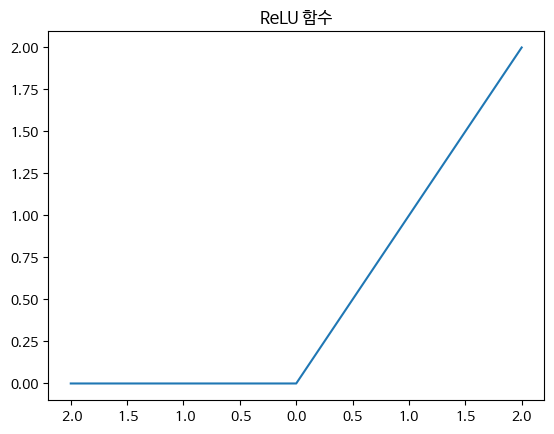

In [4]:
relu = nn.ReLU()
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np, dtype=torch.float32)
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU 함수')
plt.show()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
x_np = np.arange(-2,2.1,0.25)
y_np = np.arange(-1,3.1,0.25)
x = torch.tensor(x_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

z = x*y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [9]:
x = x.to(device)
print(x.device)
print(y.device)

cuda:0
cpu


In [10]:
z = x*y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [11]:
y = y.to(device)
z = x*y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


#### 8.8 데이터 준비 1

In [13]:
import torchvision.datasets as datasets
data_root = './data'

train_set0 = datasets.MNIST(root=data_root, train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 140565332.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41035126.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40636297.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9482592.72it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [14]:
!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Mar 21 15:09 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Mar 21 15:09 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Mar 21 15:09 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Mar 21 15:09 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Mar 21 15:09 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Mar 21 15:09 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Mar 21 15:09 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Mar 21 15:09 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Mar 21 15:09 train-labels-idx1-ubyte.gz


In [17]:
print(len(train_set0))
image, label = train_set0[0]

print(type(image))
print(type(label))

60000
<class 'PIL.Image.Image'>
<class 'int'>


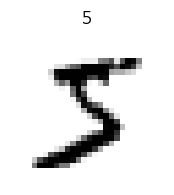

In [18]:
plt.figure(figsize=(2,2))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

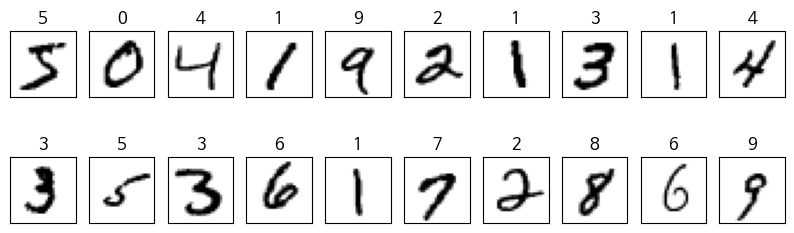

In [20]:
plt.figure(figsize=(10,3))
for i in range(20):
    ax = plt.subplot(2,10,i+1)

    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 8.9 데이터 준비 2


##### Step1. ToTensor 사용하기

In [21]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([transforms.ToTensor(), ])

train_set1 = datasets.MNIST(root=data_root, train=True, download=True, transform = transform1)

In [25]:
image, label = train_set1[0]
print(type(image))
print(type(label))
# print(image.data)
print(image.data.shape)
print(image.data.max())
print(image.data.min())

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])
tensor(1.)
tensor(0.)


##### Step2. Normalize 사용하기

In [26]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5),])
train_set2 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform2)


In [27]:
image, label = train_set2[0]
print(type(image))
print(type(label))
# print(image.data)
print(image.data.shape)
print(image.data.max())
print(image.data.min())

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])
tensor(1.)
tensor(-1.)


##### Step3. Lambda 클래스를 사용해 1차원으로 텐서 변환하기

In [31]:
transform3 = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5), transforms.Lambda(lambda x:x.view(-1)),])
train_set3 = datasets.MNIST(root=data_root, train=True, download=True, transform=transform3)

In [33]:
image, label = train_set3[0]
print(type(image))
print(type(label))
# print(image.data)
print(image.data.shape)
print(image.data.max())
print(image.data.min())

<class 'torch.Tensor'>
<class 'int'>
torch.Size([784])
tensor(1.)
tensor(-1.)


In [34]:
#Transforms의 최종 정의
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5), transforms.Lambda(lambda x:x.view(-1)),])
train_set = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_set = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)